# 0.0 Imports

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import inflection


## 0.1 Load Data

In [2]:
path = os.path.dirname(os.getcwd())
path_dataset = os.path.join(path, 'data', 'df_ready.csv')
df = pd.read_csv(path_dataset)

## 0.2 Help function

In [3]:
def snakecase(x):
    return inflection.underscore(x)

# 1.0 Descrição dos dados

In [4]:
df1 = df.copy()

# 1.1 Data dimensions

In [5]:
print(f'Number of rows: {df1.shape[0]}' )
print(f'Number of columns: {df1.shape[1]}' )


Number of rows: 23151
Number of columns: 32


## 1.2 Data types

In [6]:
df1.dtypes

Unnamed: 0           int64
Date_imp            object
Date_imp_d          object
Cluster              int64
Category_name       object
name                object
price              float64
disc_price         float64
merchant            object
condition           object
Disc_percentage    float64
isSale              object
Imp_count            int64
brand               object
p_description       object
currency            object
dateAdded           object
dateSeen            object
dateUpdated         object
imageURLs           object
manufacturer        object
shipping            object
sourceURLs          object
weight              object
Date_imp_d.1        object
Day_n               object
month                int64
month_n             object
day                  int64
Week_Number          int64
Zscore_1           float64
price_std          float64
dtype: object

## 1.3 Check NA

In [7]:
df1.isna().sum()

Unnamed: 0             0
Date_imp               0
Date_imp_d             0
Cluster                0
Category_name          0
name                   0
price                  0
disc_price             0
merchant               0
condition              0
Disc_percentage        0
isSale                 0
Imp_count              0
brand                  0
p_description          0
currency               0
dateAdded              0
dateSeen               0
dateUpdated            0
imageURLs          22696
manufacturer       10639
shipping           11497
sourceURLs          4930
weight                68
Date_imp_d.1           0
Day_n                  0
month                  0
month_n                0
day                    0
Week_Number            0
Zscore_1             171
price_std              0
dtype: int64

In [8]:
df1.columns

Index(['Unnamed: 0', 'Date_imp', 'Date_imp_d', 'Cluster', 'Category_name',
       'name', 'price', 'disc_price', 'merchant', 'condition',
       'Disc_percentage', 'isSale', 'Imp_count', 'brand', 'p_description',
       'currency', 'dateAdded', 'dateSeen', 'dateUpdated', 'imageURLs',
       'manufacturer', 'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1',
       'Day_n', 'month', 'month_n', 'day', 'Week_Number', 'Zscore_1',
       'price_std'],
      dtype='object')

In [9]:
df1 = df1.drop(columns=['Unnamed: 0', 'Date_imp', 'Cluster', 'condition',
                         'Date_imp_d', 'Zscore_1', 'price_std', 'imageURLs', 
                         'shipping', 'weight', 'currency','sourceURLs'])

In [10]:
cols_new = list(map(snakecase, df1.columns))
df1.columns = cols_new
df1['date_imp'] = df1['date_imp_d.1']

## 1.5 Changer Types

In [11]:
df1['date_imp'] = pd.to_datetime(df1['date_imp'])

## 1.7 Descriptive Statistics

In [12]:
num_attributes = df1.select_dtypes(include=['float', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float', 'int64', 'datetime64[ns]'])


## 1.7.1 Numerical atributes

In [13]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - sdt, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply(np.std)).T
d2 = pd.DataFrame( num_attributes.apply(np.min)).T
d3 = pd.DataFrame( num_attributes.apply(np.max)).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2.0 EDA

In [14]:
df2 = df1.copy()

## 2.1 Qual o merchant que mais vendeu?

<Axes: xlabel='merchant', ylabel='date_imp'>

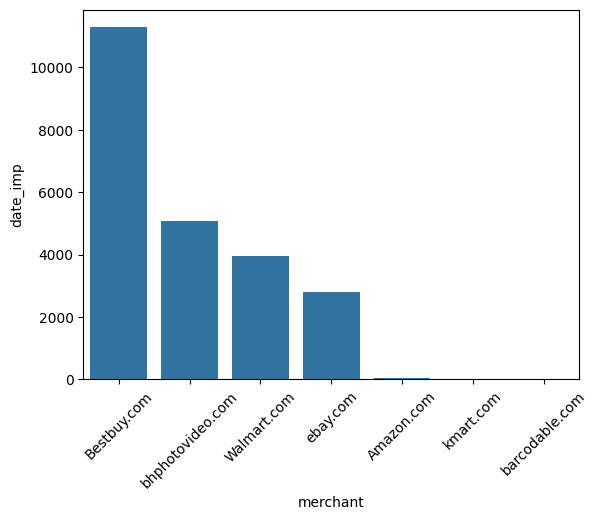

In [15]:
aux1 = (
    df2[["date_imp", "merchant"]]
    .groupby("merchant")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)
)
plt.xticks(rotation=45)
sns.barplot(x='merchant', y='date_imp', data=aux1)


In [16]:
# seleção de lojas
df_best = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart = df2[df2['merchant'] == 'Walmart.com']
df_ebay = df2[df2['merchant'] == 'ebay.com']



## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categorias masi vendidas no geral?

<Axes: xlabel='category_name', ylabel='date_imp'>

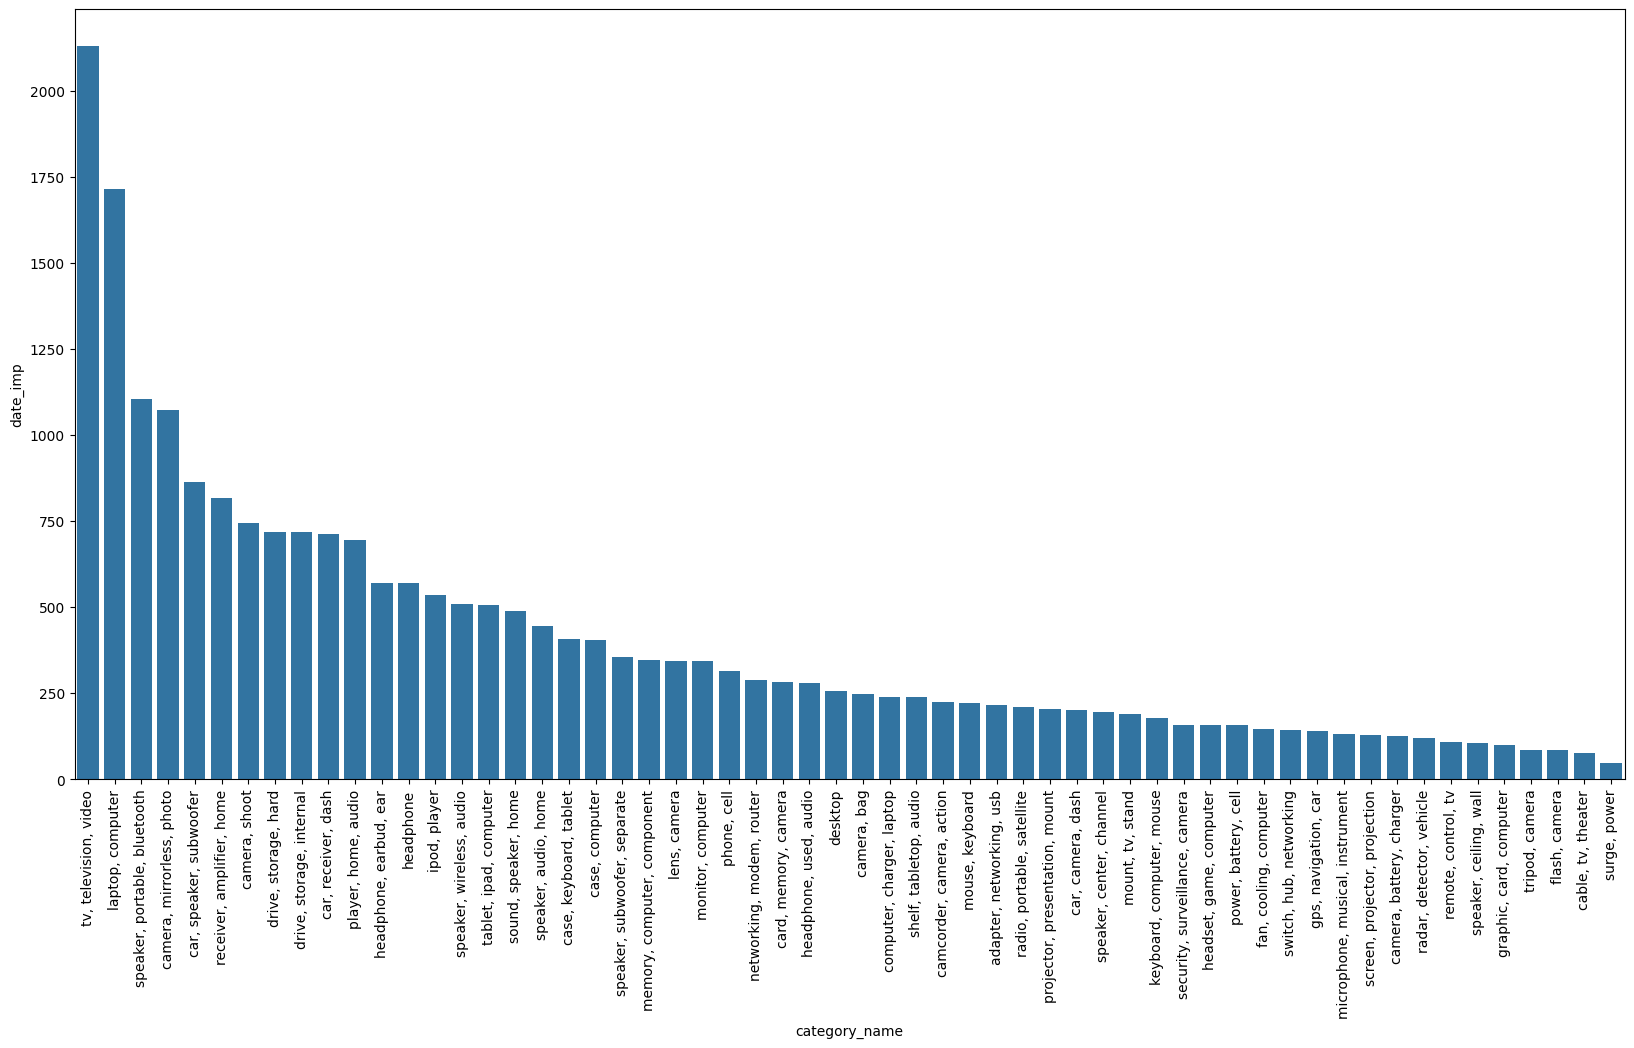

In [17]:
plt.figure(figsize=(20,10))

aux2 = (
    df2[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp', data=aux2)

### 2.2.2 Categorias mais vendidas por lojas?

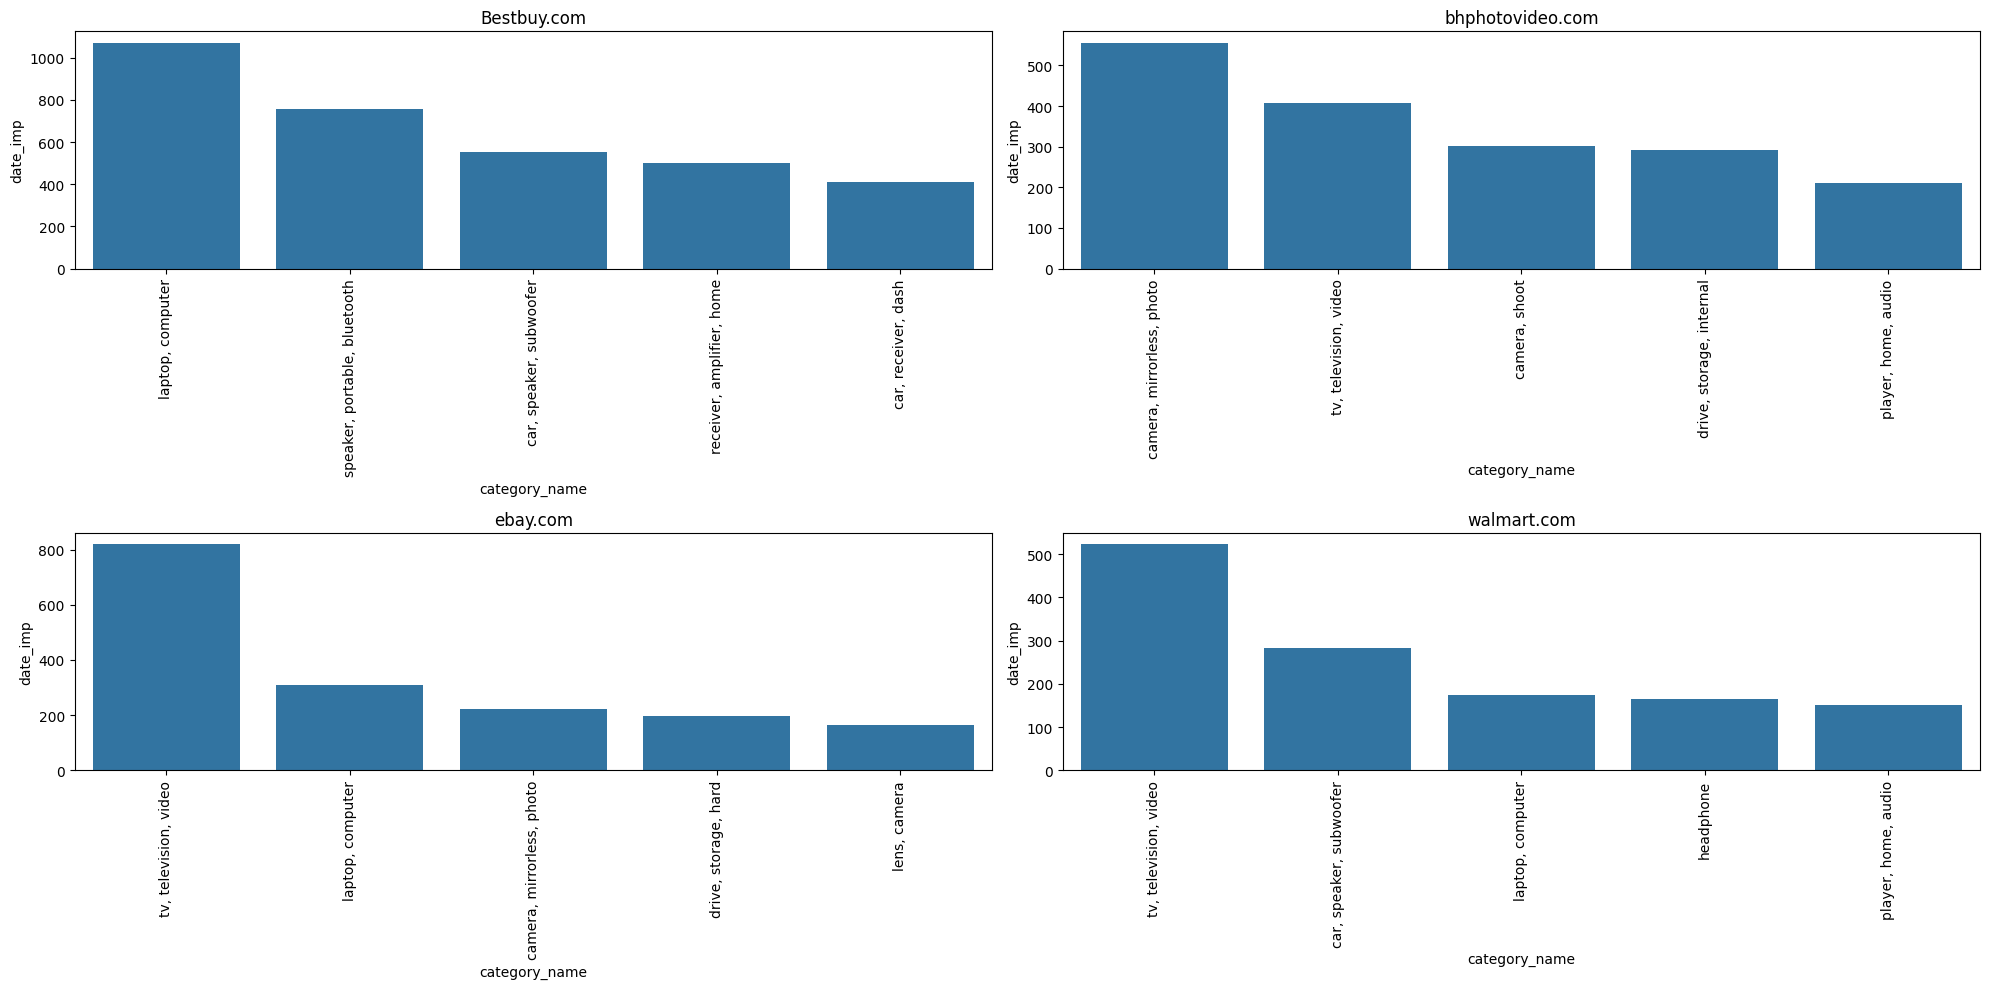

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux3 = (
    df_best[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='category_name', y='date_imp', data=aux3.head())


plt.subplot(2,2,2)
aux4 = (
    df_bhp[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='category_name', y='date_imp', data=aux4.head())


plt.subplot(2,2,3)
aux5 = (
    df_ebay[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='category_name', y='date_imp', data=aux5.head())

plt.subplot(2,2,4)
aux6 = (
    df_walmart[["date_imp", "category_name"]]
    .groupby("category_name")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='category_name', y='date_imp', data=aux6.head())

plt.tight_layout()

## 2.3 Qual a marca mais vendida?

### 2.3.1 Qual a marca mais vendida no geral?

<Axes: xlabel='brand', ylabel='date_imp'>

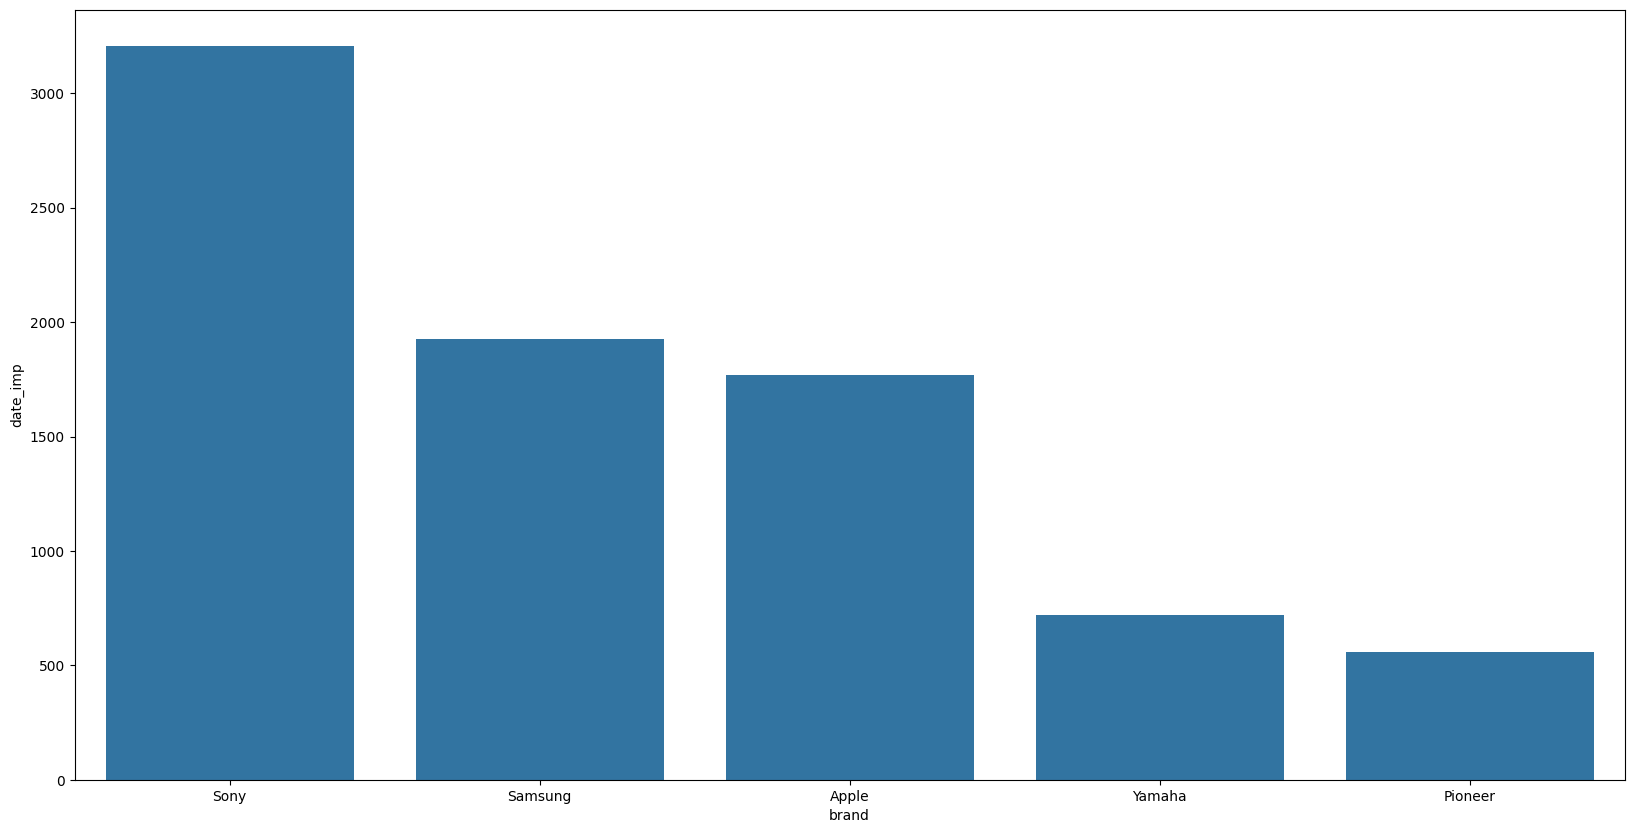

In [19]:
plt.figure(figsize=(20,10))

aux7 = (
    df2[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
sns.barplot(x='brand', y='date_imp', data=aux7.head())

### 2.3.2 Marcas mas vendidas por lojas?

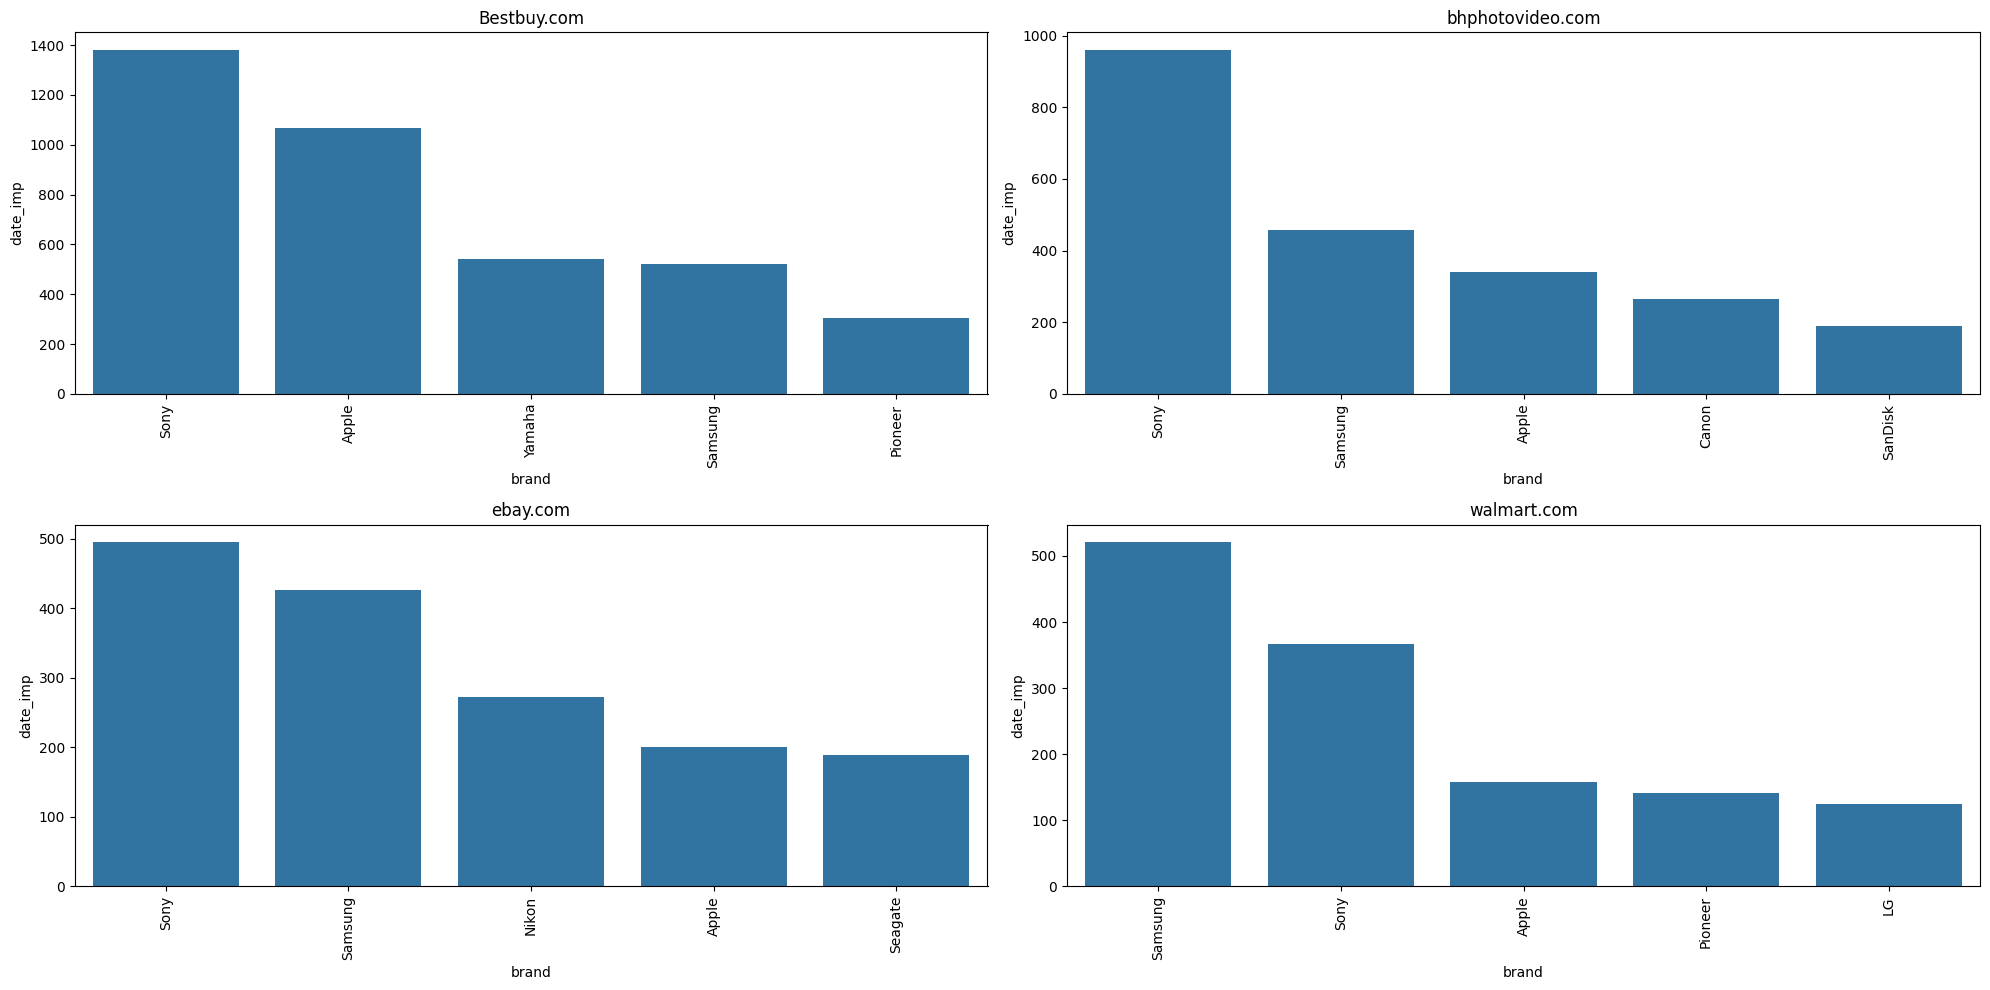

In [20]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux8 = (
    df_best[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='brand', y='date_imp', data=aux8.head())


plt.subplot(2,2,2)
aux9 = (
    df_bhp[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='brand', y='date_imp', data=aux9.head())


plt.subplot(2,2,3)
aux10 = (
    df_ebay[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='brand', y='date_imp', data=aux10.head())

plt.subplot(2,2,4)
aux11 = (
    df_walmart[["date_imp", "brand"]]
    .groupby("brand")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='brand', y='date_imp', data=aux11.head())

plt.tight_layout()

## 2.4 Quais os dias que mais vendem?

### 2.4.1 Quais os dias que mais vendem no geral?

<Axes: xlabel='day_n', ylabel='date_imp'>

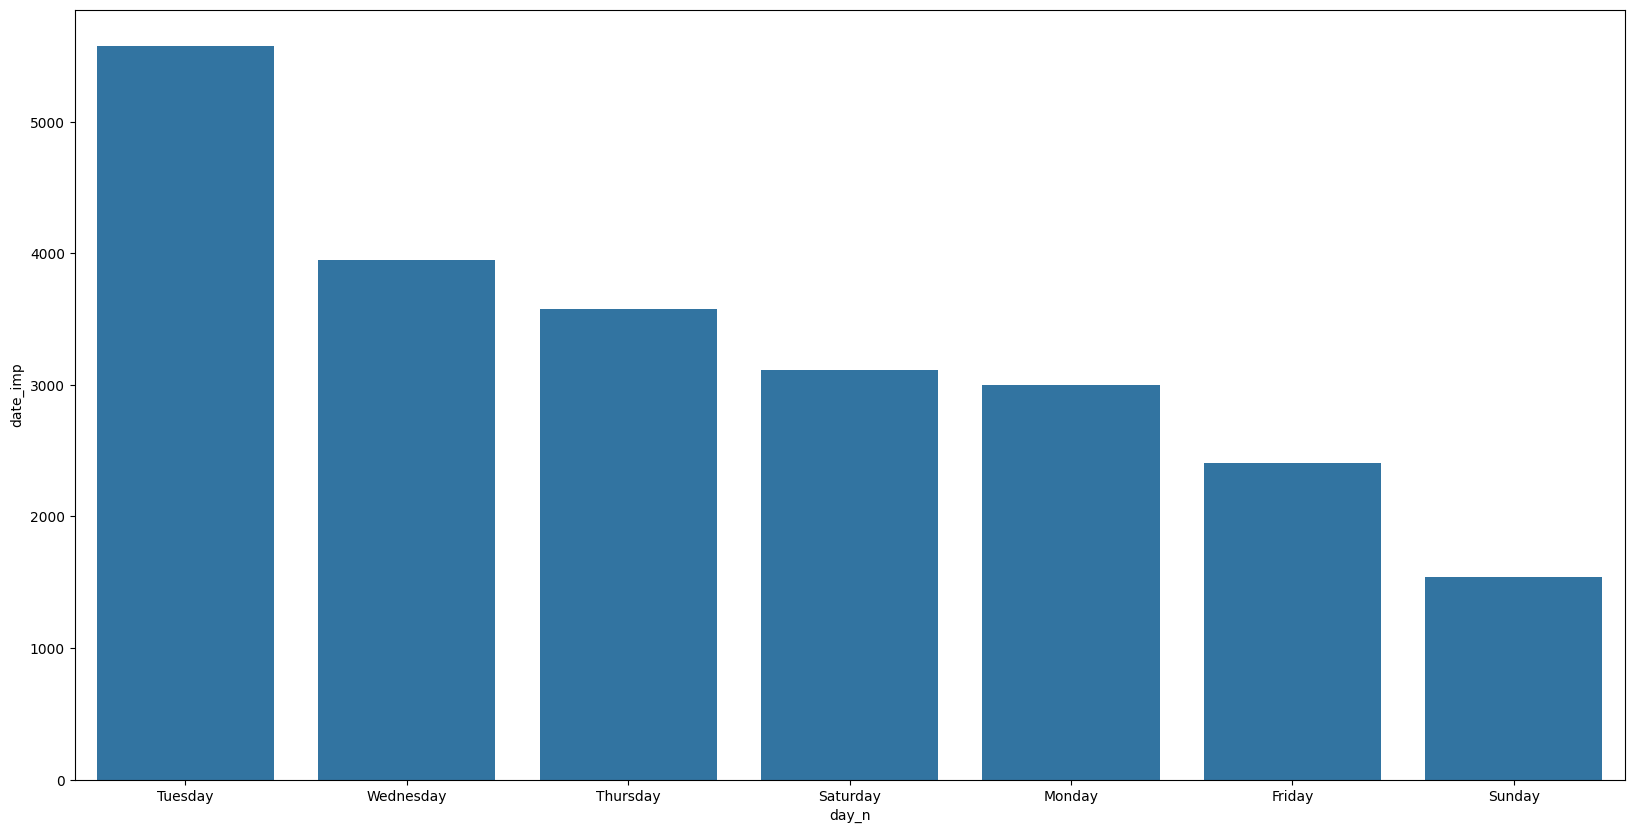

In [21]:
plt.figure(figsize=(20,10))

aux12 = (
    df2[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
sns.barplot(x='day_n', y='date_imp', data=aux12)

### 2.4.2 Dias que mais vende por lojas?

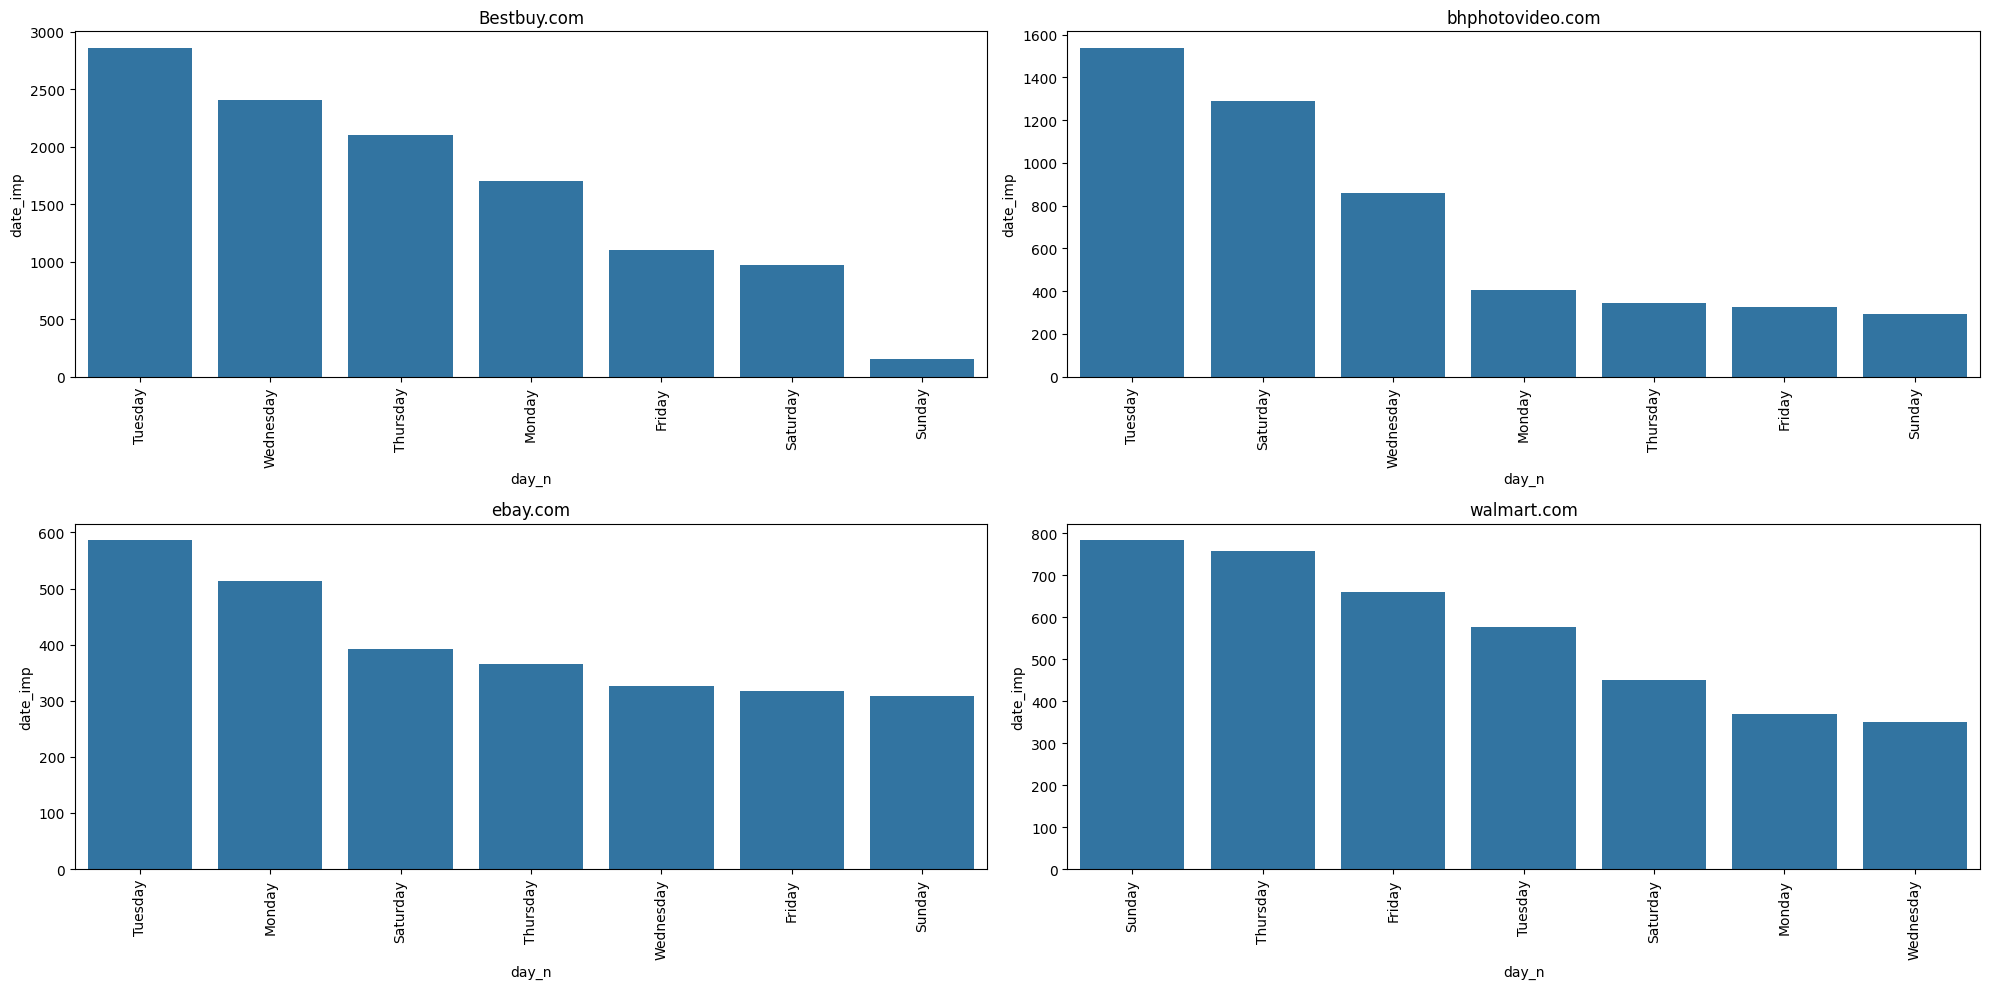

In [22]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux13 = (
    df_best[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='day_n', y='date_imp', data=aux13)


plt.subplot(2,2,2)
aux14 = (
    df_bhp[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='day_n', y='date_imp', data=aux14)


plt.subplot(2,2,3)
aux15 = (
    df_ebay[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='day_n', y='date_imp', data=aux15)

plt.subplot(2,2,4)
aux16 = (
    df_walmart[["date_imp", "day_n"]]
    .groupby("day_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='day_n', y='date_imp', data=aux16)

plt.tight_layout()

### 2.5 Quais os meses que mais vendem?

### 2.5.1 Quais os meses que mais vendem no geral?

<Axes: xlabel='month_n', ylabel='date_imp'>

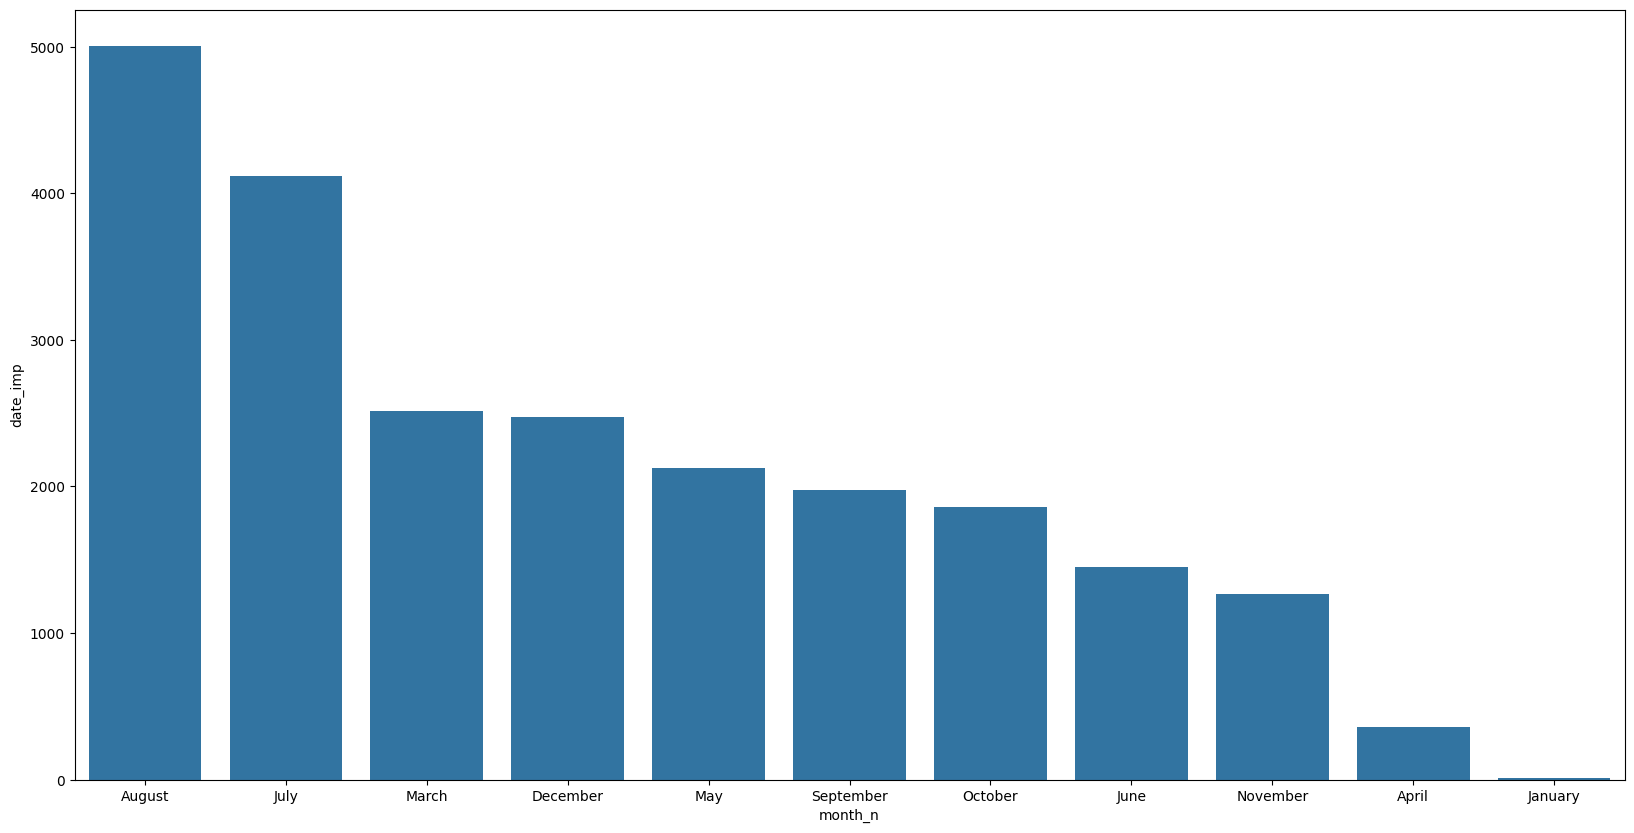

In [23]:
plt.figure(figsize=(20,10))

aux17 = (
    df2[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
sns.barplot(x='month_n', y='date_imp', data=aux17)

### 2.5.2 Meses que mais vendem por lojas?

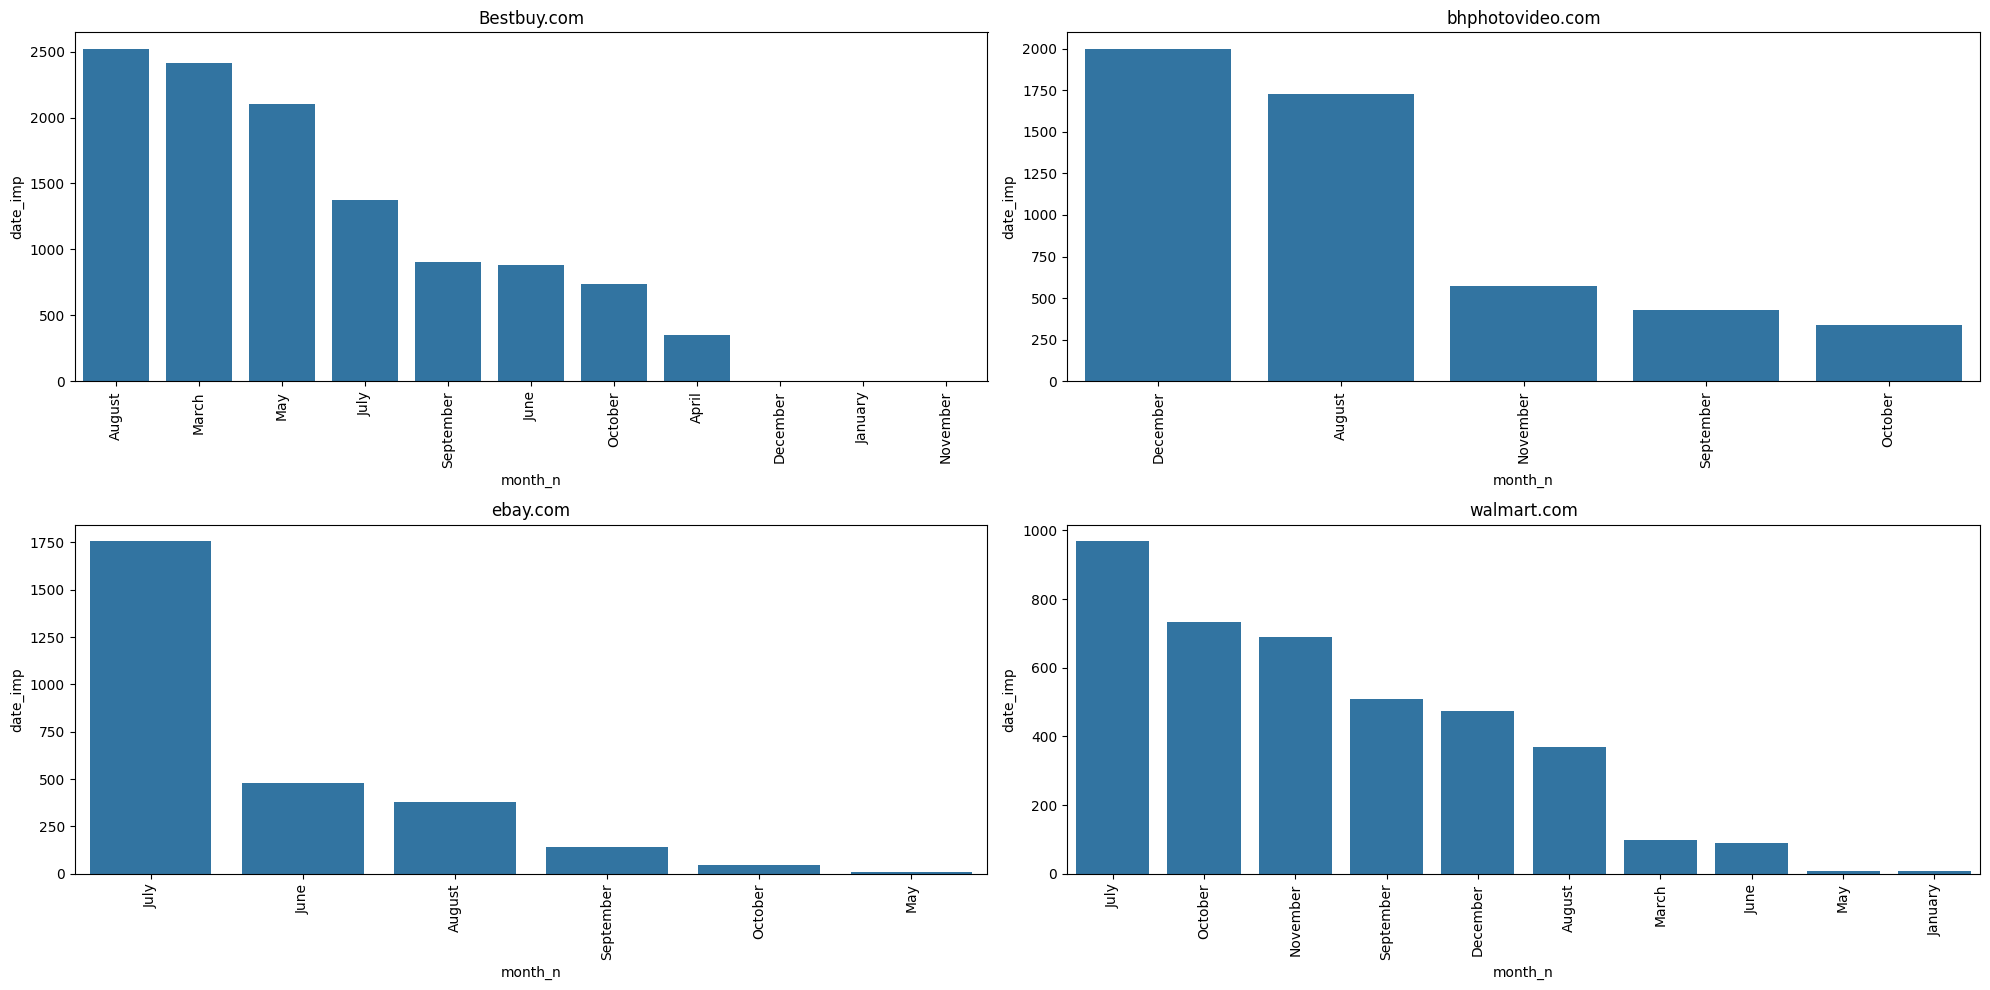

In [24]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux18 = (
    df_best[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='month_n', y='date_imp', data=aux18)


plt.subplot(2,2,2)
aux19 = (
    df_bhp[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='month_n', y='date_imp', data=aux19)


plt.subplot(2,2,3)
aux20 = (
    df_ebay[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='month_n', y='date_imp', data=aux20)

plt.subplot(2,2,4)
aux21 = (
    df_walmart[["date_imp", "month_n"]]
    .groupby("month_n")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='month_n', y='date_imp', data=aux21)

plt.tight_layout()

### 2.6 Quais as semanas que mais vendem?

### 2.6.1 Quais os semanas que mais vendem no geral?

<Axes: xlabel='week_number', ylabel='date_imp'>

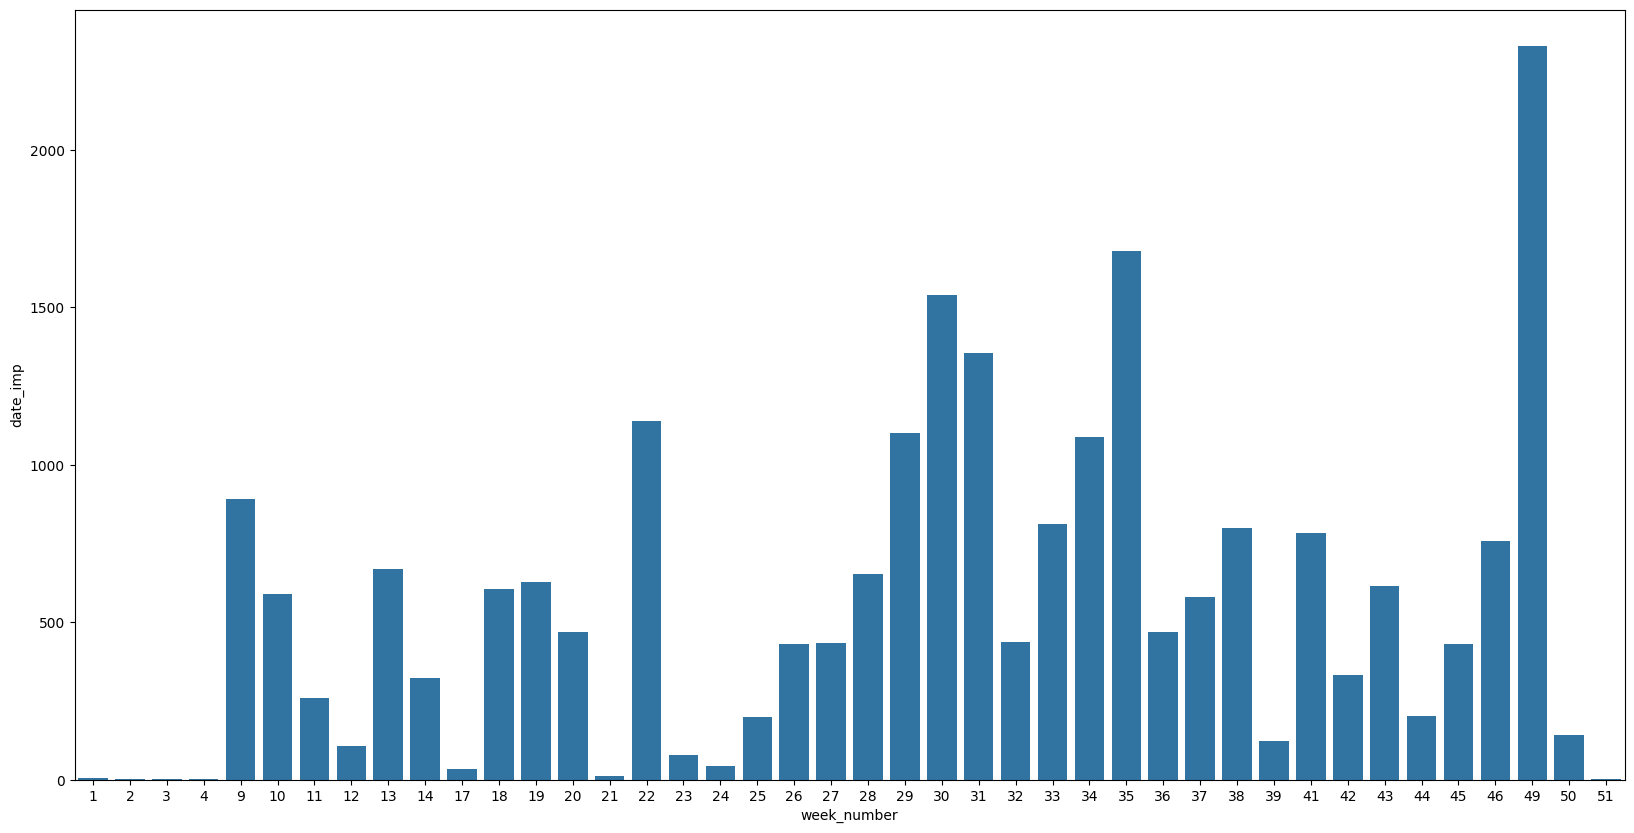

In [25]:
plt.figure(figsize=(20,10))

aux22 = (
    df2[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)
)
sns.barplot(x='week_number', y='date_imp', data=aux22)

### 2.4.2 Meses que mais vendem por lojas?

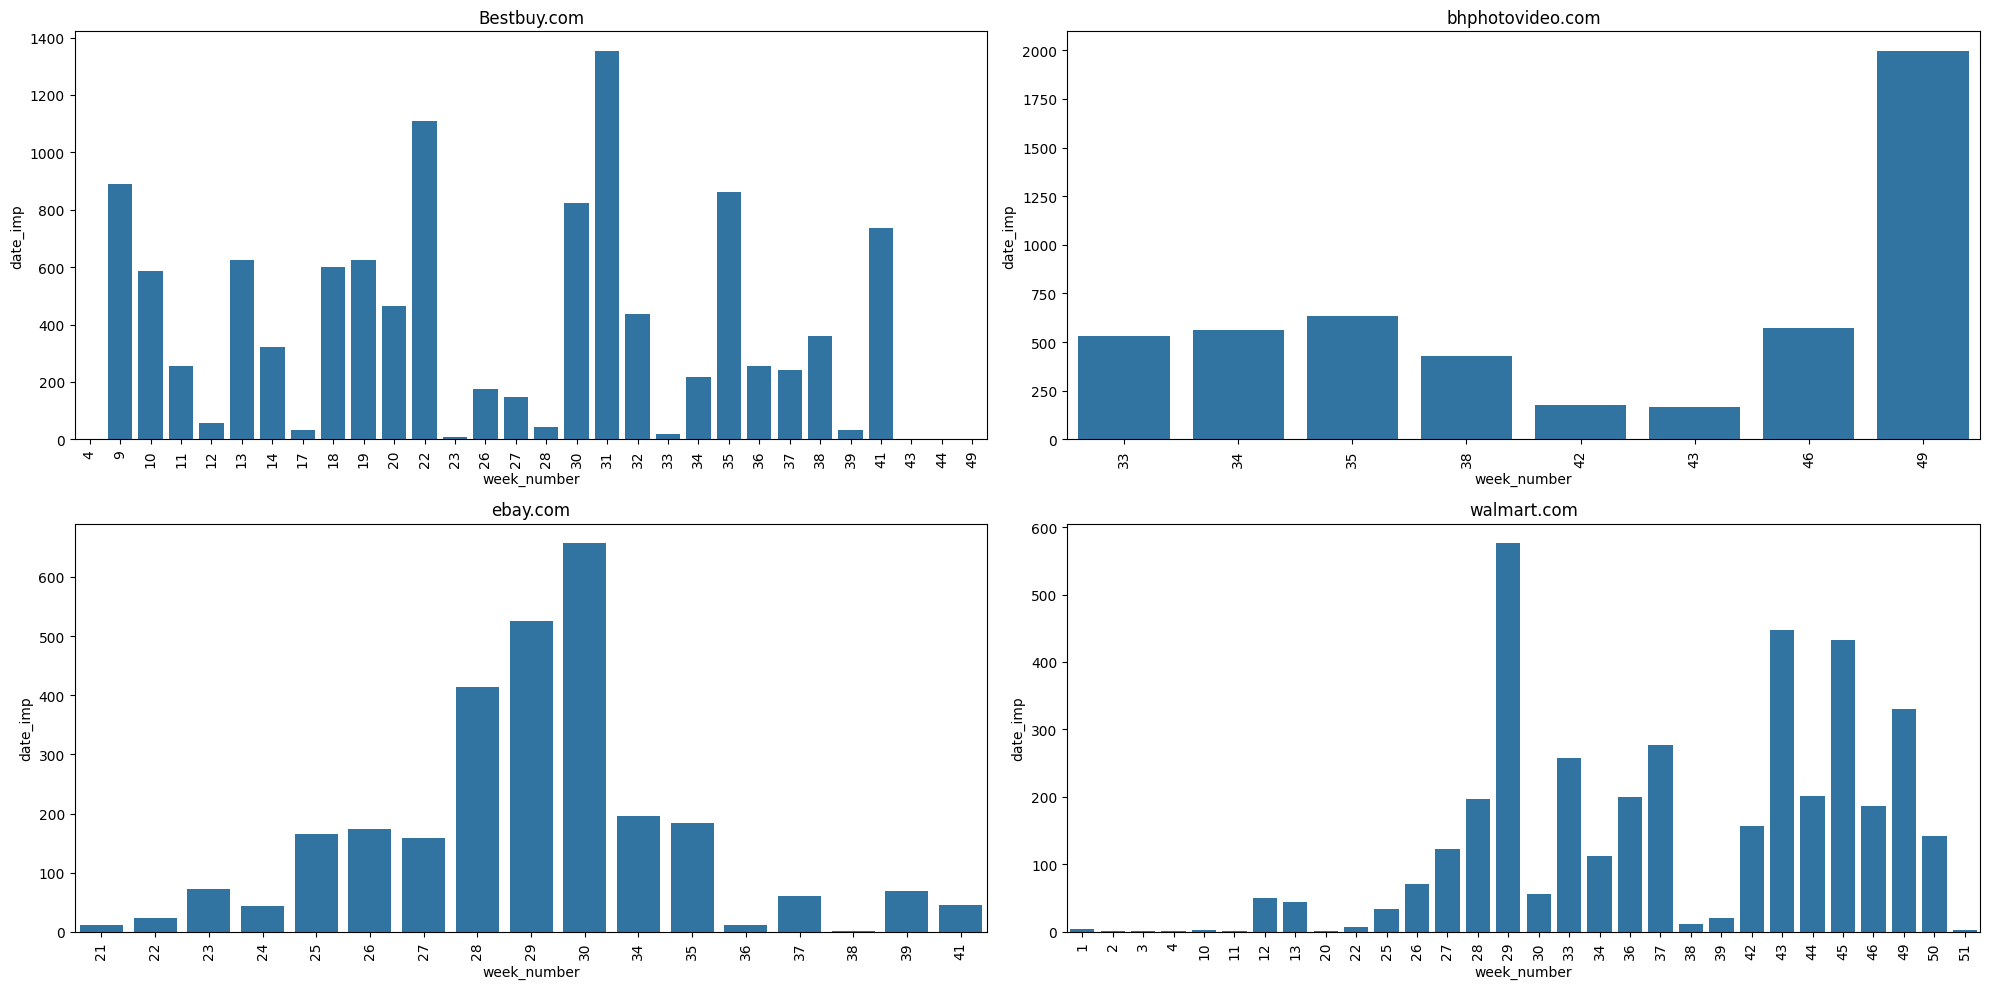

In [26]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
aux23 = (
    df_best[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(x='week_number', y='date_imp', data=aux23)


plt.subplot(2,2,2)
aux24 = (
    df_bhp[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('bhphotovideo.com')
sns.barplot(x='week_number', y='date_imp', data=aux24)


plt.subplot(2,2,3)
aux25 = (
    df_ebay[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('ebay.com')
sns.barplot(x='week_number', y='date_imp', data=aux25)

plt.subplot(2,2,4)
aux26 = (
    df_walmart[["date_imp", "week_number"]]
    .groupby("week_number")
    .count()
    .reset_index()
    .sort_values(by="date_imp", ascending=False)

)
plt.xticks(rotation=90)
plt.title('walmart.com')
sns.barplot(x='week_number', y='date_imp', data=aux26)

plt.tight_layout()

# 3.0 Feature Engineering

In [27]:
df3 = df2.copy()

## 3.1 Categoria mais vendida da Bestbuy.com

In [28]:
df_laptop = df_best[df_best['category_name'] == 'laptop, computer']

In [29]:
df_laptop.isna().sum()

category_name        0
name                 0
price                0
disc_price           0
merchant             0
disc_percentage      0
is_sale              0
imp_count            0
brand                0
p_description        0
date_added           0
date_seen            0
date_updated         0
manufacturer       627
date_imp_d.1         0
day_n                0
month                0
month_n              0
day                  0
week_number          0
date_imp             0
dtype: int64

In [33]:
dataset = (
    df_laptop.groupby(["name", "week_number"])
    .agg({"disc_price": "mean", "date_imp": "count"})
    .reset_index()
)
dataset

,name,week_number,disc_price,date_imp
0,"12 MacBook (Mid 2017, Gold)",30,1599.99,1
1,"12 MacBook (Mid 2017, Gold)",31,1551.99,8
2,"12 MacBook (Mid 2017, Gold)",33,1454.99,2
3,"12 MacBook (Mid 2017, Gold)",34,1551.99,2
4,"12 MacBook (Mid 2017, Gold)",35,1474.49,4
...,...,...,...,...
454,Samsung - Notebook 5 15.6 Touch-Screen Laptop ...,31,610.99,4
455,Samsung - Notebook 5 15.6 Touch-Screen Laptop ...,34,600.99,2
456,Samsung - Notebook 5 15.6 Touch-Screen Laptop ...,35,600.99,2
457,Samsung - Notebook 5 15.6 Touch-Screen Laptop ...,38,591.49,2


In [34]:
# criando dataframe dos valores
x_price = dataset.pivot(index="week_number", columns="name", values="disc_price")
# x_price

In [37]:
y_demand = dataset.pivot(index='week_number', columns='name', values='date_imp')
# y_demand

# Descrição dos novos dataframes

# 4.0 Descrição dos dados

In [ ]:
# 4.1 Data Dimension

In [38]:
print(f'Number of rows:{x_price.shape[0]}')
print(f'Number of columns:{x_price.shape[1]}')

Number of rows:26
Number of columns:39


In [ ]:
print(f'Number of rows:{y_demand.shape[0]}')
print(f'Number of columns:{y_demand.shape[1]}')

Number of rows:26
Number of columns:39


## 4.2 Data Types

In [39]:
x_price.dtypes

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    float64
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                    

In [41]:
y_demand.dtypes

name
12 MacBook (Mid 2017, Gold)                            float64
12 MacBook (Mid 2017, Silver)                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus           float64
13.3 MacBook Air (Mid 2017, Silver)                    float64
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)    float64
dtype: object

## 4.3 Check NA

In [42]:
x_price.isna().sum()

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    21
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                                        

In [43]:
y_demand.isna().sum()

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    21
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                                        

## 4.5 Replace NA

In [45]:
price_median = np.round(x_price.median(),2)
x_price.fillna(price_median, inplace=True)
x_price.head()

name,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
week_number,,,,,,,,,,,,,,,,,,,,,
4,1551.99,1299.99,415.500,949.99,2618.99,2353.99,304.99,829.99,249.000,1899.99,...,819.99,463.74,218.49,601.49,415.99,337.49,2399.99,853.74,4179.99,610.99
9,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,236.495,1599.99,...,799.99,499.99,218.49,664.99,379.99,316.99,2399.99,807.49,4179.99,617.49
10,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,238.995,1899.99,...,819.99,429.99,229.99,664.99,474.99,335.99,2399.99,949.99,4179.99,617.49
11,1551.99,1299.99,415.500,949.99,2715.99,2482.99,304.99,829.99,249.000,1899.99,...,819.99,463.74,218.49,601.49,474.99,383.99,2399.99,853.74,4179.99,569.99
13,1551.99,1299.99,449.000,949.99,2547.99,2353.99,304.99,849.99,223.995,1899.99,...,819.99,499.99,203.49,636.99,444.99,369.99,2399.99,909.99,4179.99,591.49


In [46]:
y_demand.fillna(0, inplace=True)
y_demand.head()

name,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
week_number,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,4.0,0.0,3.0,6.0,0.0,2.0,4.0,1.0,...,1.0,2.0,0.0,4.0,4.0,4.0,0.0,4.0,0.0,2.0
10,0.0,0.0,2.0,0.0,1.0,4.0,0.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0
11,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0
13,0.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,2.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0


## 4.6 Descriptive Statistics

In [47]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(x_price.apply(np.mean)).T
ct2 = pd.DataFrame(x_price.apply(np.median)).T

# Dispersion - sdt, min, max, range, skew, kurtosis

d1 = pd.DataFrame( x_price.apply(np.std)).T
d2 = pd.DataFrame( x_price.apply(np.min)).T
d3 = pd.DataFrame( x_price.apply(np.max)).T
d4 = pd.DataFrame( x_price.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( x_price.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( x_price.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,"12 MacBook (Mid 2017, Gold)",1454.990,1599.99,145.000,1547.124615,1551.99,25.648346,-2.457686,8.310054
1,"12 MacBook (Mid 2017, Silver)",1234.990,1299.99,65.000,1295.990000,1299.99,14.317821,-3.735032,13.784949
2,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,372.995,449.00,76.005,413.189808,415.50,15.423120,-1.054924,2.830858
3,"13.3 MacBook Air (Mid 2017, Silver)",911.990,969.99,58.000,949.297692,949.99,8.393080,-2.975611,16.702015
4,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",2327.990,2799.99,472.000,2607.393846,2618.99,112.833610,-1.131897,2.049122
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",2023.990,2599.99,576.000,2346.913077,2353.99,122.523757,-0.274833,1.347179
6,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,237.490,313.49,76.000,299.720769,304.99,16.347918,-2.916993,8.218479
7,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,764.990,899.99,135.000,834.028462,829.99,27.804926,0.937281,2.943939
8,Acer 15.6 Chromebook CB5-571-C4G4,199.990,249.00,49.010,242.479231,249.00,14.017001,-2.306458,4.514429
9,Alienware - R3 17.3 Laptop - Intel Core i7 - 1...,1599.990,1899.99,300.000,1879.643846,1899.99,71.165540,-3.486137,11.301211


In [48]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(y_demand.apply(np.mean)).T
ct2 = pd.DataFrame(y_demand.apply(np.median)).T

# Dispersion - sdt, min, max, range, skew, kurtosis

d1 = pd.DataFrame( y_demand.apply(np.std)).T
d2 = pd.DataFrame( y_demand.apply(np.min)).T
d3 = pd.DataFrame( y_demand.apply(np.max)).T
d4 = pd.DataFrame( y_demand.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( y_demand.apply(lambda x: x.skew())).T
d6 = pd.DataFrame( y_demand.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,"12 MacBook (Mid 2017, Gold)",0.0,8.0,8.0,0.961538,0.0,1.764626,2.738840,9.024976
1,"12 MacBook (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
2,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,0.0,4.0,4.0,1.038462,0.5,1.125945,0.606680,-0.428079
3,"13.3 MacBook Air (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.788227,1.658711,0.807453
4,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",0.0,6.0,6.0,1.153846,0.0,1.609881,1.437577,1.673167
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",0.0,12.0,12.0,3.230769,1.0,3.885948,0.951022,-0.225438
6,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,0.0,2.0,2.0,0.538462,0.0,0.887120,1.105353,-0.849951
7,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
8,Acer 15.6 Chromebook CB5-571-C4G4,0.0,4.0,4.0,0.769231,1.0,0.932643,1.711207,4.066693
9,Alienware - R3 17.3 Laptop - Intel Core i7 - 1...,0.0,2.0,2.0,0.615385,1.0,0.624926,0.534925,-0.518213
